<a href="https://colab.research.google.com/github/sjelodari/DSSS-WS2022/blob/main/DSSS_Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
import numpy as geek 
!pip install pycocotools --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
mnist = tfds.load('mnist')
train_data, val_data, test_data = tfds.load("mnist", 
                                            #split=['train[10000:]', 'train[0:10000]', 'test'], 
                                            split=['train[20%:]', 'train[0%:20%]', 'test'],
                                            as_supervised=True)

def helper(ds):
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x) / 255.0, np.asarray(y)

train_images, train_labels = helper(train_data)
val_images, val_labels = helper(val_data)
test_images, test_labels = helper(test_data)

In [3]:
class_names = ['0','1', '2', '3', '4', '5',
               '6', '7', '8', '9']

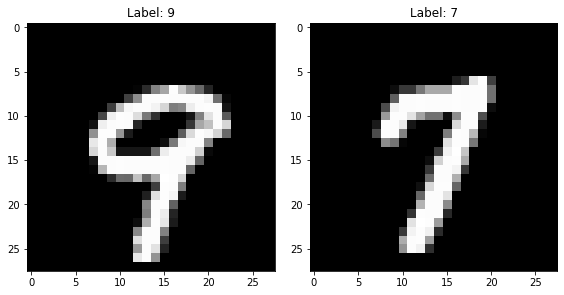

In [4]:
num_row = 1
num_col = 2
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(4*num_col,4*num_row))
for i in range(2):
    ax = axes[i]
    z = np.random.randint(0, 48000)
    ax.imshow(train_images[z,...,0],cmap='gray')
    ax.set_title('Label: {}'.format(train_labels[z]))
plt.tight_layout()
plt.show()

In [5]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(8, (3, 3),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3),strides=(1,1), activation='relu', input_shape=(14, 14, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3),strides=(1,1), activation='relu', input_shape=(7, 7, 1)))
model.add(tf.keras.layers.Flatten(input_shape=(7, 7, 1)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 13s 7ms/step - loss: 0.2599 - acc: 0.9168 - val_loss: 0.0730 - val_acc: 0.9772
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0867 - acc: 0.9727 - val_loss: 0.0565 - val_acc: 0.9816
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0629 - acc: 0.9805 - val_loss: 0.0413 - val_acc: 0.9872
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0498 - acc: 0.9840 - val_loss: 0.0408 - val_acc: 0.9885
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0418 - acc: 0.9866 - val_loss: 0.0410 - val_acc: 0.9868
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0360 - acc: 0.9882 - val_loss: 0.0479 - val_acc: 0.9838
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0304 - acc: 0.9905 - val_loss: 0.0408 - val_acc: 0.9878
Epoch 8/10
1500/1500 [==============================] - 6s 4ms/step - lo

Text(0.5, 0, 'epochs')

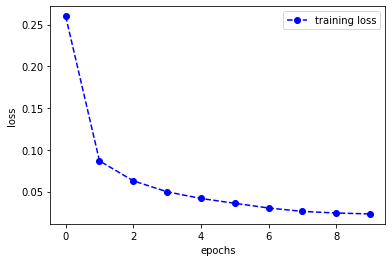

In [7]:
plt.plot(history.history['loss'], '--bo', label="training loss")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [10]:
best_model_accuracy = history.history['acc'][geek.argmax(history.history['val_acc'])]
print("The best model accuracy is: ",best_model_accuracy)

The best model accuracy is:  0.992020845413208
